# UN Data Exploration for NSS Data Science - Abigail Ezell

### 3. In the first cell of your notebook, import the required packages with their customary aliases as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 4. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. After reading it in, inspect the first 10 rows and then inspect the last 10 rows.

In [2]:
gdp_df=pd.read_csv("../data/gdp_per_capita.csv")

In [3]:
gdp_df.head(n=10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
5,Afghanistan,2018,2902.392113,NaN
6,Afghanistan,2017,2952.998916,NaN
7,Afghanistan,2016,2958.785399,NaN
8,Afghanistan,2015,2967.692067,NaN
9,Afghanistan,2014,3017.942544,NaN


In [4]:
gdp_df.tail(n=10)

,Country or Area,Year,Value,Value Footnotes
8209,Zimbabwe,1999,4238.195198,NaN
8210,Zimbabwe,1998,4342.858177,NaN
8211,Zimbabwe,1997,4304.406272,NaN
8212,Zimbabwe,1996,4271.479930,NaN
8213,Zimbabwe,1995,3935.280057,NaN
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


### 5. Dropping the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
gdp_df = (
    gdp_df
    .drop(columns='Value Footnotes')
    .rename(columns={'Country or Area':'Country','Value':'GDP_Per_Capita'})
)

In [6]:
gdp_df.shape

(8219, 3)

*There are 8,219 rows and 3 columns in gdp_df*

In [7]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

*The data type for Year is integer, the data type for GDP is float, and the data type for the 'Country' column is 'object', which is the pandas datatype used for text or mixed numeric and non-numeric values. To explicitly convert the countries data to the string data type, we could run the following:*

In [8]:
gdp_df['Country'] = gdp_df['Country'].astype("string")
# Validate Country data was converted to string
print(gdp_df['Country'].dtype)

string


### 6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

### 7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [9]:
gdp_df['Year'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
       2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002,
       2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991,
       1990])

*The dataset contains data from 1990 to 2023.*

In [10]:
gdp_df['Year'].value_counts()

Year
2021    247
2020    247
2019    247
2018    247
2017    247
2016    247
2015    247
2014    247
2013    247
2012    246
2022    246
2011    246
2010    245
2009    245
2008    244
2007    242
2006    242
2005    241
2004    241
2003    241
2002    241
2000    240
2023    240
2001    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64

*There are generally more observations as the years increase, indicating the addition of new countries over the years.*

### 8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [11]:
gdp_df['Country'].unique()

<StringArray>
[                'Afghanistan', 'Africa Eastern and Southern',
  'Africa Western and Central',                     'Albania',
                     'Algeria',                     'Andorra',
                      'Angola',         'Antigua and Barbuda',
                  'Arab World',                   'Argentina',
 ...
         'Upper middle income',                     'Uruguay',
                  'Uzbekistan',                     'Vanuatu',
                    'Viet Nam',              'Virgin Islands',
          'West Bank and Gaza',                       'World',
                      'Zambia',                    'Zimbabwe']
Length: 247, dtype: string

*There are 247 unique countries represented in the dataset.*

In [12]:
gdp_df['Country'].value_counts().tail()

Country
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, dtype: Int64

*I would assume Djibouti, Turks and Caicos, Sint Maarten, and Kosovo have the fewest observations either because they are relatively new countries, or because they are very small countries that might not have the resources to regularly gather GDP data.*

### 9. Create a new dataframe by subsetting gdp_df to just the year 2021. Call this new dataframe gdp_2021.

In [13]:
gdp_2021 = gdp_df[ gdp_df['Year'] == 2021 ]

### 10. Use .describe() to find the summary statistics for GDP per capita in 2021.

In [14]:
gdp_2021['GDP_Per_Capita'].describe()

count       247.000000
mean      24478.517262
std       24601.525764
min         836.665571
25%        5996.532844
50%       15900.976581
75%       37298.776853
max      135379.291201
Name: GDP_Per_Capita, dtype: float64

### 11. Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

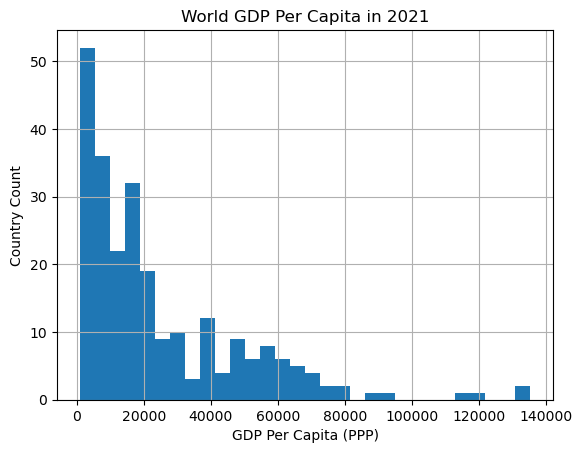

In [15]:
gdp_2021["GDP_Per_Capita"].hist(bins=30)
plt.title('World GDP Per Capita in 2021')
plt.xlabel('GDP Per Capita (PPP)')
plt.ylabel('Country Count')
plt.show()

*The distribution has a pronounced right skew, with a relatively small number of countries having a very large GDP per capita. The frequency peaks in the leftmost bin of the histogram, around 0-10,000 GDP per capita.*

### 12. Find the top 5 countries and bottom 5 countries by GDP per capita in 2021.

In [16]:
# Top 5 countries by GDP per capita in 2021
gdp_2021.sort_values(by='GDP_Per_Capita').tail()

,Country,Year,GDP_Per_Capita
740,Bermuda,2021,92276.234605
6118,Qatar,2021,116832.570290
3492,Ireland,2021,118594.746862
6513,Singapore,2021,131864.092336
4425,Luxembourg,2021,135379.291201


In [17]:
# Bottom 5 countries by GDP per capita in 2021
gdp_2021.sort_values(by='GDP_Per_Capita').head()

,Country,Year,GDP_Per_Capita
1045,Burundi,2021,836.665571
1301,Central African Republic,2021,1128.552380
1733,Dem. Rep. Congo,2021,1313.618218
6698,Somalia,2021,1392.464262
5132,Mozambique,2021,1457.235409


### 13. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2021 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named gdp_pivoted.

In [18]:
gdp_pivoted = (
    gdp_df[ (gdp_df['Year'] == 1990) | (gdp_df['Year'] == 2021) ]
    .pivot_table(values='GDP_Per_Capita', index='Country', columns='Year')
    .dropna()
)

### 14. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [19]:
gdp_pivoted['Percent_Change']=100*(gdp_pivoted[2021] - gdp_pivoted[1990]) / gdp_pivoted[1990]

### 15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

In [20]:
neg_percent_change = len(gdp_pivoted[ gdp_pivoted['Percent_Change']<0 ])
print(f'There were {neg_percent_change} countries that experienced a negative percent change in GDP per capita from 1990 to 2021.')

There were 23 countries that experienced a negative percent change in GDP per capita from 1990 to 2021.


### 16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2018. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare? Bonus: Put both line charts on the same plot.

In [21]:
# Sort gdp_pivoted by the percent change column
gdp_pivoted = gdp_pivoted.sort_values(by='Percent_Change')
print('The country with the highest percent change in GDP per capita is ' + gdp_pivoted.iloc[-1].name + '.')
print('The country with the second highest percent change in GDP per capita is ' + gdp_pivoted.iloc[-2].name + '.')

The country with the highest percent change in GDP per capita is Equatorial Guinea.
The country with the second highest percent change in GDP per capita is China.


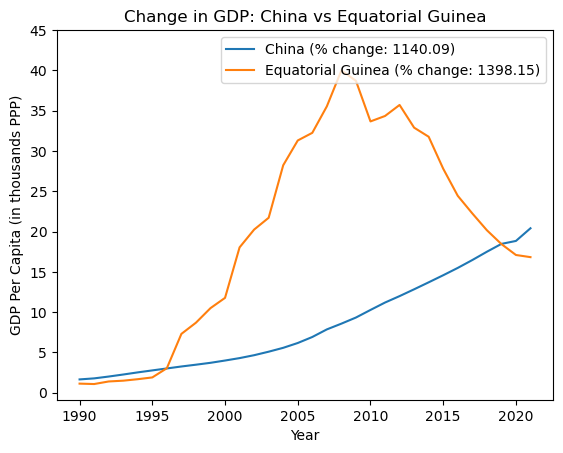

In [22]:
China_GDP_data=gdp_df[(gdp_df['Country'] == 'China')  
        & ((gdp_df['Year'] >= 1990) & (gdp_df['Year']<=2021))]
EG_GDP_data=gdp_df[(gdp_df['Country'] == 'Equatorial Guinea') 
        & ((gdp_df['Year'] >= 1990) & (gdp_df['Year']<=2021))]
# Create the line plot
ax=China_GDP_data.plot(x='Year',y='GDP_Per_Capita',kind='line',label=f'China (% change: {gdp_pivoted.loc['China','Percent_Change']:.2f})')
EG_GDP_data.plot(x='Year',y='GDP_Per_Capita',kind='line', label=f'Equatorial Guinea (% change: {gdp_pivoted.loc['Equatorial Guinea','Percent_Change']:.2f})', ax=ax)
plt.title('Change in GDP: China vs Equatorial Guinea')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita (in thousands PPP)')
plt.yticks([0,5000,10000,15000,20000,25000,30000,35000,40000,45000], [0,5,10,15,20,25,30,35,40,45])

plt.show()

*The GDP change in Equatorial Guinea is shaped like a curve; there was dramatic growth from 1995 to 2008, then a decline. In contrast, the GDP change in China showed steady growth from 1990 onward.*

### 17. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [23]:
continents=pd.read_csv("../data/continents.csv")

### 18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [24]:
gdp_df=gdp_df.merge(continents, how='inner', on='Country')

### 19. Determine the number of countries per continent. Create a bar chart showing this.

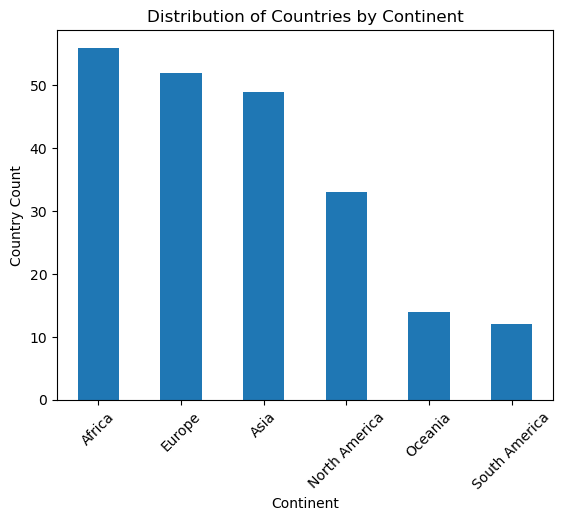

In [25]:
countries_per_continent=continents['Continent'].value_counts()
countries_per_continent.plot(kind='bar', rot=45)
plt.title('Distribution of Countries by Continent')
plt.xlabel('Continent')
plt.ylabel('Country Count')
plt.show()

### 20. Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

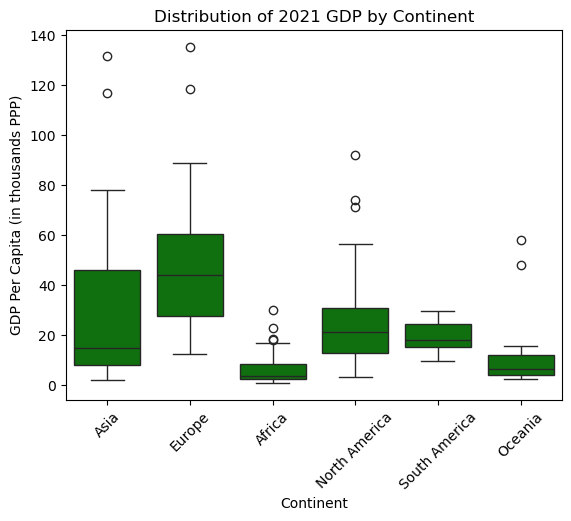

In [26]:
# First get the data from gdp_df from just 2021, which contains continent data (while gdp_2021 does not)
gdp_2021_by_continent = gdp_df[ gdp_df['Year'] == 2021 ]
# Then create the boxplot of that data
sns.boxplot(x="Continent", y="GDP_Per_Capita", data=gdp_2021_by_continent, color='green')
plt.title('Distribution of 2021 GDP by Continent')
plt.yticks([0,20000,40000,60000,80000,100000,120000,140000], [0,20,40,60,80,100,120,140])
plt.xticks(rotation=45)
plt.xlabel('Continent')
plt.ylabel('GDP Per Capita (in thousands PPP)')
plt.show()

*Based on the boxplot, Africa and Oceania have mostly low-GDP countries (20,000 PPP and below), while Europe has the highest proportion of countries with a GDP of 40,000+ PPP (about 50%). All continents, with the exception of South America, have 2-3 extreme outliers, representing countries with a very high GDP compared with other countries in the same continent. The GDP distribution for all continents is right-skewed, with the skew being more pronounced for some continents (Africa, Oceania, and Asia) and less pronounced for others (Europe, North America, and South America).*

### 21. Download the full csv containing Life expectancy at birth, total (years) from https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false. Read this data into a DataFrame named life_expectancy. Note: When reading this dataset it, you may encounter an error. Modify your read_csv call to correct this without modifying the original csv file.

In [27]:
# Skip first 4 rows since they are headers
life_expectancy=pd.read_csv("../data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_22997.csv",skiprows=4)

### 22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use .melt() to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to Country, Year, and Life_Expectancy.

In [28]:
life_expectancy = (
    life_expectancy
    .drop(columns=['Country Code', 'Indicator Name','Indicator Code'])
    .melt(id_vars='Country Name')
    .rename(columns={'Country Name':'Country','variable':'Year','value':'Life_Expectancy'})
)

### 23. What was the first country with a life expectancy to exceed 80?

In [29]:
# Finding the minimum year that a life expectancy was greater than or equal to 80, along with the associated country
high_le_sorted = life_expectancy[ life_expectancy['Life_Expectancy']>80 ].sort_values('Year')
first_80_le_country = high_le_sorted.iloc[0,0]
first_80_le_year = high_le_sorted.iloc[0,1]
first_80_le_le = high_le_sorted.iloc[0,2]
print(f'The first country with a life expectancy to exceed 80 was {first_80_le_country} in the year {first_80_le_year}. The life expectancy was {first_80_le_le}.')

# Validating that there wasn't another country tied for the earliest year 
second_80_le_country = high_le_sorted.iloc[1,0]
second_80_le_year = high_le_sorted.iloc[1,1]
second_80_le_le = high_le_sorted.iloc[1,2]
print(f'The second country with a life expectancy to exceed 80 was {second_80_le_country} in the year {second_80_le_year}. The life expectancy was {second_80_le_le}.')


The first country with a life expectancy to exceed 80 was Monaco in the year 1992. The life expectancy was 80.065.
The second country with a life expectancy to exceed 80 was Andorra in the year 1993. The life expectancy was 80.186.


### 24. Merge gdp_df and life_expectancy, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named gdp_le. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [30]:
# The initial error indicates that the data types of the columns we're joining on doesn't match between the two dataframes. 
# I'll convert both 'Year' and 'Country' to string in both dataframes
gdp_df['Year'] = gdp_df['Year'].astype("string")
life_expectancy['Year'] = life_expectancy['Year'].astype("string")
# I'll convert Country to string in life_expectancy
life_expectancy['Country'] = life_expectancy['Country'].astype("string")

In [31]:
# Validate gdp_df and life_expectancy have matching data types for Country and Year
gdp_df.dtypes

Country                   object
Year              string[python]
GDP_Per_Capita           float64
Continent                 object
dtype: object

In [32]:
life_expectancy.dtypes

Country            string[python]
Year               string[python]
Life_Expectancy           float64
dtype: object

In [33]:
# Merge gdp_df and life_expectancy on country and year columns
gdp_le=gdp_df.merge(life_expectancy, on=['Country','Year'], how='inner')
# Merged dataframe was initially coming out as blank; checking to make sure there are no trailing or leading spaces
gdp_df['Country']=gdp_df['Country'].str.strip()
life_expectancy['Country']=life_expectancy['Country'].str.strip()
gdp_df['Year']=gdp_df['Year'].str.strip()
life_expectancy['Year']=life_expectancy['Year'].str.strip()
print(gdp_le)

          Country  Year  GDP_Per_Capita Continent  Life_Expectancy
0     Afghanistan  2023     1992.424394      Asia           66.035
1     Afghanistan  2022     1981.710168      Asia           65.617
2     Afghanistan  2021     2144.166570      Asia           60.417
3     Afghanistan  2020     2769.685745      Asia           61.454
4     Afghanistan  2019     2927.245144      Asia           62.941
...           ...   ...             ...       ...              ...
5851     Zimbabwe  1994     3965.730986    Africa           52.537
5852     Zimbabwe  1993     3634.750494    Africa           53.976
5853     Zimbabwe  1992     3649.891947    Africa           55.602
5854     Zimbabwe  1991     4126.405247    Africa           57.037
5855     Zimbabwe  1990     4013.299059    Africa           58.319

[5856 rows x 5 columns]


### 25. Create a new DataFrame, named gdp_le_2021 by extracting data for the year 2021 from gdp_le. How many countries have a life expectancy of at least 80 in 2021?

In [34]:
gdp_le_2021=gdp_le[gdp_le['Year']=='2021']
print(f'There were {len(gdp_le_2021[gdp_le_2021['Life_Expectancy']>=80])} countries with a life expectancy of at least 80 in 2021.')

There were 33 countries with a life expectancy of at least 80 in 2021.


### 26. Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [35]:
gdp_le_2021_sorted=gdp_le_2021.sort_values('GDP_Per_Capita')
print(f'The countries with the 3 largest GDP per capita figures for 2021 were {gdp_le_2021_sorted.iloc[-1,0]}, {gdp_le_2021_sorted.iloc[-2,0]}, and {gdp_le_2021_sorted.iloc[-3,0]}.')

The countries with the 3 largest GDP per capita figures for 2021 were Luxembourg, Singapore, and Ireland.


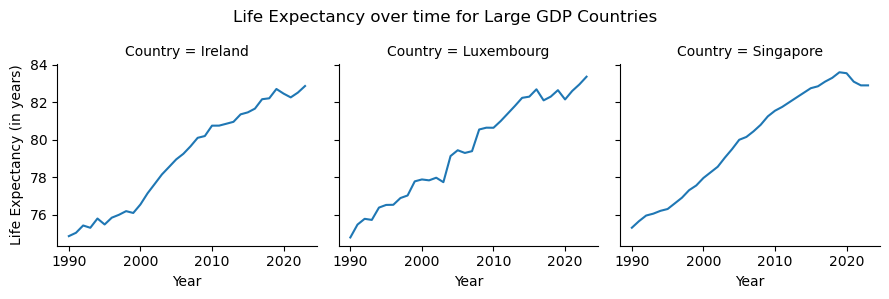

In [36]:
# Convert year to integer for plotting purposes
gdp_le['Year'] = gdp_le['Year'].astype("int64")
# Slice the gdp_le dataframe to just our countries of interest
high_GDP_le = gdp_le[
    (gdp_le['Country']=='Singapore') 
    | (gdp_le['Country']=='Luxembourg') 
    | (gdp_le['Country']=='Ireland')]
# Form a facetgrid using life expectancy for Luxembourg, Singapore, and Ireland
le_plot = sns.FacetGrid(high_GDP_le, col ='Country')
# Map the above facetgrid 
le_plot.map(sns.lineplot, 'Year','Life_Expectancy')
le_plot.set_axis_labels("Year", "Life Expectancy (in years)")
le_plot.fig.subplots_adjust(top=0.8)
le_plot.fig.suptitle('Life Expectancy over time for Large GDP Countries')
# Show the object
plt.show()

### 27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?

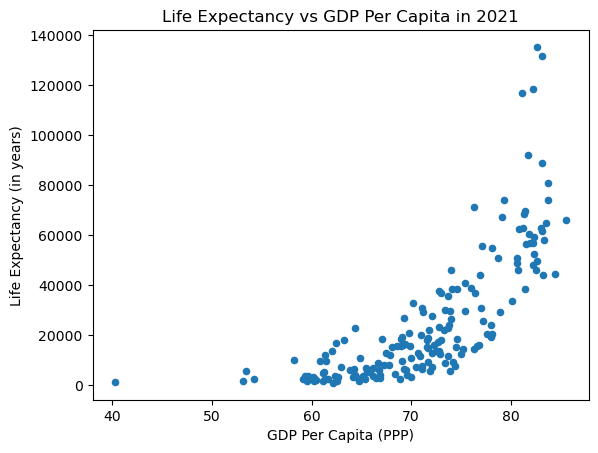

In [37]:
gdp_le_2021.plot.scatter(x='Life_Expectancy', y='GDP_Per_Capita')
plt.title('Life Expectancy vs GDP Per Capita in 2021')
plt.xlabel('GDP Per Capita (PPP)')
plt.ylabel('Life Expectancy (in years)')
plt.show()

*The scatterplot has a roughly exponential shape, with life expectancy rising drastically as GDP per capita increases. There is also more variation in life expectancy as GDP per capita increases; that is, the countries with the highest GDP per capita have a wide range of life expectancies (anywhere from about 50,000 to almost 140,000).*

### 28. Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?

In [38]:
gdp_le_2021[['Life_Expectancy','GDP_Per_Capita']].corr()

,Life_Expectancy,GDP_Per_Capita
Life_Expectancy,1.000000,0.752785
GDP_Per_Capita,0.752785,1.000000


*The correlation coefficient for the relationship between life expectancy and GDP per capita in 2021 was R=0.75. This indicates a strong positive correlation between the 2 variables; that is, higher life expectancy tends to be associated with high GDP per capita.*

### 29. Add a column to gdp_le_2021 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

In [44]:
gdp_le_2021.loc[:,'Log_GDP'] = np.log(gdp_le_2021.loc[:,'GDP_Per_Capita'])

In [45]:
gdp_le_2021[['Life_Expectancy','Log_GDP']].corr()

,Life_Expectancy,Log_GDP
Life_Expectancy,1.000000,0.849065
Log_GDP,0.849065,1.000000


*The correlation coefficient between life expectancy and the log of GDP per capita in 2021 was R=0.85. This is a stronger correlation than the correlation between life expectancy and the normal (non-log transformed) GDP per capita data. The below scatterplot suppports this, as the residuals are smaller than the plot above, especially as log(GDP) increases.*

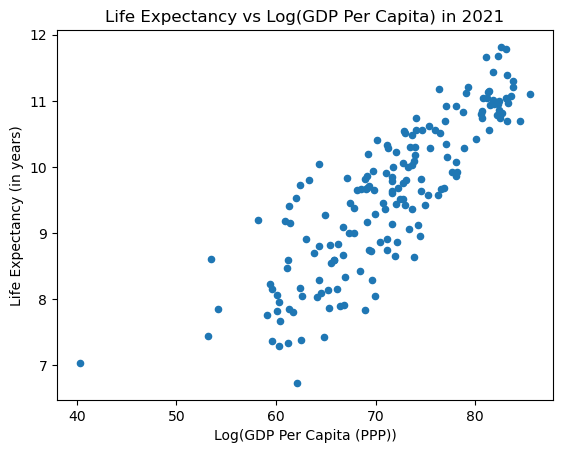

In [46]:
gdp_le_2021.plot.scatter(x='Life_Expectancy', y='Log_GDP')
plt.title('Life Expectancy vs Log(GDP Per Capita) in 2021')
plt.xlabel('Log(GDP Per Capita (PPP))')
plt.ylabel('Life Expectancy (in years)')
plt.show()

### Bonus 1: Choose and download another data set from the UN data http://data.un.org/Explorer.aspx to explore. You may want to combine your new dataset with one or both of the datasets that you already worked with. Report any interesting correlations or trends that you find.

In [ ]:
# Dataset: Women's share of tertiary enrolment in science
wmn_science=pd.read_csv("../data/women_in_science.csv")
wmn_science = (
    wmn_science
            .drop(columns=['Subgroup','Source','Unit','Value Footnotes'])
            .rename(columns={'Value':'Women_in_Science','Country or Area':'Country'})
            .dropna()
    )

In [ ]:
wmn_science.dtypes

In [ ]:
gdp_le.dtypes

In [ ]:
# Standardize our datatypes before merging
wmn_science['Year'] = wmn_science['Year'].astype("int64")
wmn_science['Year'] = wmn_science['Year'].astype("string")
# Drop junk values
wmn_science=wmn_science[(wmn_science['Women_in_Science'] != '-') & (wmn_science['Women_in_Science'] != '…')]
# Convert women_in_science to int
wmn_science['Women_in_Science'] = wmn_science['Women_in_Science'].astype("int64")

In [ ]:
gdp_le_wmn=gdp_le.merge(wmn_science, on=['Country','Year'], how='inner')

In [ ]:
# Question: is percentage of women in science in 2004 correlated with either GDPs or life expectancy?
gdp_le_wmn_2004=gdp_le_wmn[gdp_le_wmn['Year']=='2004']

In [ ]:
gdp_le_wmn_2004.plot.scatter(x='Women_in_Science', y='GDP_Per_Capita')
plt.title('Women in Science vs GDP Per Capita in 2004')
plt.xlabel('Women in Science (Percent of tertiary enrollment)')
plt.xticks(rotation=45)
plt.ylabel('GDP Per Capita (PPP)')
plt.show()
gdp_le_wmn_2004[['Women_in_Science','GDP_Per_Capita']].corr()

In [ ]:
gdp_le_wmn_2004.plot.scatter(x='Women_in_Science', y='Life_Expectancy')
plt.title('Women in Science vs Life Expectancy in 2004')
plt.xlabel('Women in Science (Percent of tertiary enrollment)')
plt.xticks(rotation=45)
plt.ylabel('Life Expectancy')
plt.show()
gdp_le_wmn_2004[['Women_in_Science','Life_Expectancy']].corr()

*There is an extremely weak correlation between women in science and GDP and women in science and life expectancy.*

### Bonus 2: If time allows, check out the plotly library to add additional interativity to your plots. https://plotly.com/python/plotly-express/.

In [47]:
# Create a hover label plot for gdp and life expectancy with dot size relative to population for the year 2021
# First, need to merge population data into gdp_le
pop=pd.read_csv('../data/population_data.csv', dtype={'Year': str}).dropna()
pop= (
    pop[(pop['Sex']=='Both Sexes') & (pop['Age']=='Total') & (pop['Area']=='Total')]
    .drop(columns=['Record Type','Reliability','Source Year','Value Footnotes','Area','Sex','Age'])
    .rename(columns={'Country or Area':'Country','Value':'Population'})
                   )

In [49]:
pop.dtypes

Country        object
Year           object
Population    float64
dtype: object

In [50]:
# Creating a hover label plot of gdp and life expectancy with dot size relative to population. 
# First need to find pop data and merge it in to gdp_le.
pop=pd.read_csv('../data/population_data.csv',dtype={'Year': str}).dropna()
pop=(
    pop[(pop['Area']=='Total') & (pop['Age']=='Total') & (pop['Sex']=='Both Sexes')]
    .rename(columns={'Country or Area':'Country','Value':'Population'})
    .drop(columns=['Area','Sex','Age','Record Type','Reliability','Source Year','Value Footnotes'])
)
pop

,Country,Year,Population
0,Afghanistan,1979,13051358.0
229,Åland Islands,2024,30597.5
727,Åland Islands,2023,30450.0
1225,Åland Islands,2022,30351.5
1739,Åland Islands,2021,30236.5
...,...,...,...
93580,Australia,2006,20701488.0
95670,Australia,2004,20091504.0
98583,Australia,1999,18925855.0
99009,Australia,1997,18517564.0


In [51]:
pop.dtypes

Country        object
Year           object
Population    float64
dtype: object

In [52]:
gdp_le.dtypes

Country             object
Year                 int64
GDP_Per_Capita     float64
Continent           object
Life_Expectancy    float64
dtype: object

In [78]:
pop['Year'] = pop['Year'].astype("int64")

In [79]:
gdp_le_pop=gdp_le.merge(pop,on=['Country','Year'],how='inner')

In [80]:
gdp_le_pop_2016=gdp_le_pop[gdp_le_pop['Year']==2016]

In [82]:
gdp_le_pop_2016

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,Population
21,Andorra,2016,64402.809237,Europe,84.48900,72358.0
22,Andorra,2016,64402.809237,Europe,84.48900,71732.0
50,Antigua and Barbuda,2016,26637.418160,North America,76.96800,92157.0
64,Argentina,2016,27802.105720,South America,76.10500,43590368.0
105,Australia,2016,56305.896429,Oceania,82.44878,23401892.0
106,Australia,2016,56305.896429,Oceania,82.44878,24190907.0


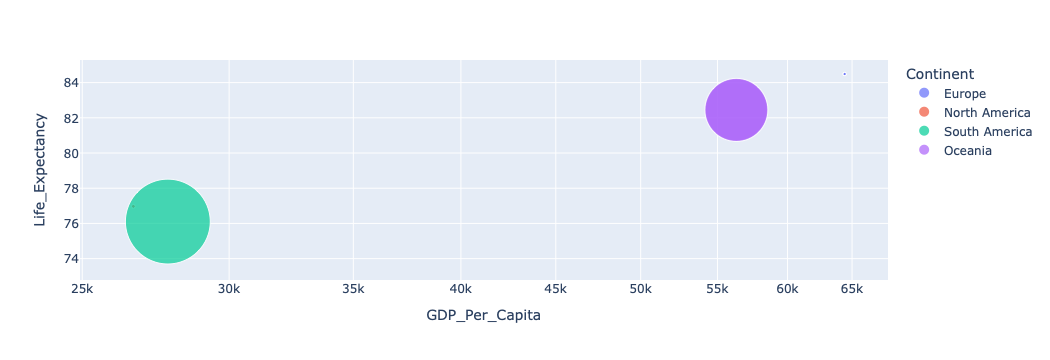

In [74]:
# Then, create the plot
import plotly.express as px
gdp_le_pop = px.data.gapminder()
fig = px.scatter(gdp_le_pop_2015, x="GDP_Per_Capita", y="Life_Expectancy", size="Population", color="Continent",
           hover_name="Country", log_x=True, size_max=60)
fig.show()